#### Algorithm training:

In [434]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from wordcloud import WordCloud

In [435]:
# Importing dataset and separating labels

train_data = pd.read_csv("D:\ML\Datasets\emails.csv")
y_train = train_data['spam']
train_data.drop(labels='spam', axis=1, inplace=True)

In [436]:
# Creating bag of words

vectorizer = CountVectorizer(max_features=500, stop_words=['subject'])
                             #, strip_accents="unicode")
X = vectorizer.fit_transform(train_data.text)
features = vectorizer.get_feature_names() # to check feature names if required
X_train = X.toarray()

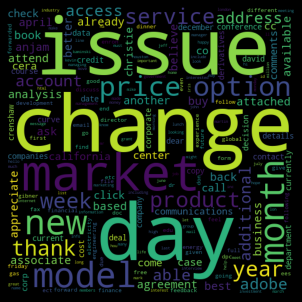

In [437]:
# Creating wordcloud

spam_wordcloud = WordCloud(width=512, height=512).generate(' '.join(features))
plt.figure(facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [438]:
# Splitting the dataset

state = 12
train_size = 0.6
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=train_size, stratify=y_train, random_state=state)
                                                            # stratify=y_train preserves spam to ham ratio, might not be needed

In [439]:
# Building trees

gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_features=2, max_depth=8, random_state=0, verbose=1)
                                                                                                    # can specify loss function
gb_clf.fit(X_train, y_train)
print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_val, y_val)))

      Iter       Train Loss   Remaining Time 
         1           1.0500            0.40s
         2           1.0199            0.49s
         3           0.9866            0.48s
         4           0.9495            0.48s
         5           0.9111            0.47s
         6           0.8794            0.47s
         7           0.8603            0.45s
         8           0.8288            0.45s
         9           0.8069            0.44s
        10           0.7859            0.44s
        20           0.6287            0.38s
        30           0.4879            0.34s
        40           0.3912            0.29s
        50           0.3357            0.24s
        60           0.2916            0.20s
        70           0.2569            0.15s
        80           0.2231            0.10s
        90           0.2012            0.05s
       100           0.1799            0.00s
Accuracy score (training): 0.992
Accuracy score (validation): 0.967


In [440]:
# Confusion matrix

predictions = gb_clf.predict(X_val)
print('Confusion Matrix:') # printing confusion matrix using test values of Y and the predictive value of y
print(confusion_matrix(y_val, predictions))

Confusion Matrix:
[[1727   18]
 [  58  489]]


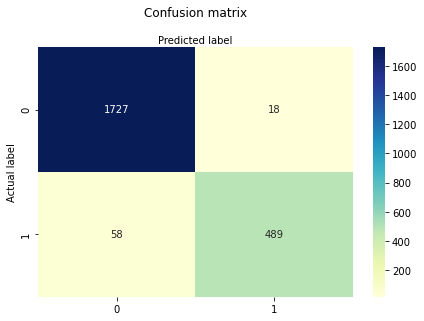

In [441]:
# Printing confusion matrix in the colored format seen below in output

cm = confusion_matrix(y_val, predictions)
cm
class_names=[0, 1] # names of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Creating heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu",fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [442]:
# Printing classification report

print("Classification Report:")
print(classification_report(y_val, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1745
           1       0.96      0.89      0.93       547

    accuracy                           0.97      2292
   macro avg       0.97      0.94      0.95      2292
weighted avg       0.97      0.97      0.97      2292



#### Using a diiferent dataset to test the algorithm:

In [443]:
# Testing using a different dataset

test_data = pd.read_csv("D:\ML\Datasets\spam.csv", encoding='Windows-1252')
test_data.v1 = test_data.v1.replace(to_replace=['ham', 'spam'], value =[0, 1])
test_data.drop(test_data.columns[-3:], axis=1, inplace=True)

# Filtering to only spam
test_data = test_data.loc[test_data['v1'] == 1]

y_test = test_data['v1']
test_data.drop(labels='v1', axis=1, inplace=True)
y_test.head(5)

2     1
5     1
8     1
9     1
11    1
Name: v1, dtype: int64

In [444]:
vectorizer_2 = CountVectorizer(max_features=500)
                             #, strip_accents="unicode")
X_2 = vectorizer_2.fit_transform(test_data.v2)
features_2 = vectorizer_2.get_feature_names() # to check feature names if required
X_test = X_2.toarray()

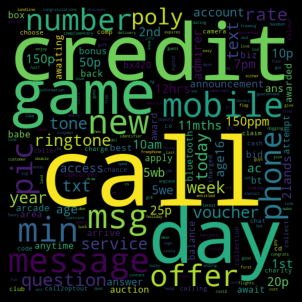

In [445]:
test_wordcloud = WordCloud(width=512, height=512).generate(' '.join(features_2))
plt.figure(facecolor='k')
plt.imshow(test_wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [446]:
print("Accuracy score (test): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Accuracy score (test): 0.100


In [447]:
# Confusion matrix

predictions = gb_clf.predict(X_test)
print('Confusion Matrix:') # printing confusion matrix using test values of Y and the predictive value of y
print(confusion_matrix(y_test, predictions))

Confusion Matrix:
[[  0   0]
 [672  75]]


In [448]:
# Printing classification report

print("Classification Report:")
print(classification_report(y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.10      0.18       747

    accuracy                           0.10       747
   macro avg       0.50      0.05      0.09       747
weighted avg       1.00      0.10      0.18       747



C:\Users\AD\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Feature Correlation Review:

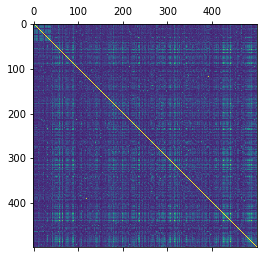

In [449]:
X_train_df = pd.DataFrame(data=X_train)
plt.matshow(X_train_df.corr())
plt.show()